In [2]:
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import re

# Custom sorting function to extract the numeric part from dose folder names
def dose_sort_key(dose_folder):
    match = re.search(r'\d+', dose_folder)
    if match:
        return int(match.group())
    return 0

In [3]:
# Define the parent folder path
parent_folder = r'/media/andystewart/Samsung_T5/2023/2023_PtychographyExperiments/ImagingMicroscopy/'

# Get the list of dose folders excluding "infinite_dose"
dose_folders = [folder for folder in os.listdir(parent_folder) if folder.endswith("_dose") and folder != "infinite_dose"]
# Sort dose_folders using the custom sorting function
dose_folders = sorted(dose_folders, key=dose_sort_key, reverse=True)
# Construct the path to the infinite dose folder
infinite_folder = os.path.join(parent_folder, "infinite_dose", "4DSTEM_infinite_output_plots")

In [4]:
# Load infinite amplitude and phase once
infinite_amplitude_path = os.path.join(infinite_folder, "ssb_amplitude_data.npy")
infinite_phase_path = os.path.join(infinite_folder, "ssb_phase_data.npy")
infinite_amplitude = np.load(infinite_amplitude_path)
infinite_phase = np.load(infinite_phase_path)

In [5]:
# Initialize lists to store SSIM values
amplitude_ssim_infinite_influence_list = []
amplitude_ssim_infinite_b4influence_list = []
amplitude_ssim_influence_b4influence_list = []

phase_ssim_infinite_influence_list = []
phase_ssim_infinite_b4influence_list = []
phase_ssim_influence_b4influence_list = []


#Initialize lists and store difference images

amplitude_diff_infinite_b4influence_list = []
amplitude_diff_infinite_influence_list = []
amplitude_diff_b4influence_influence_list = []

phase_diff_infinite_b4influence_list = []
phase_diff_infinite_influence_list = []
phase_diff_b4influence_influence_list = []

# Iterate through each dose folder
for dose_folder in dose_folders:
    dose_path = os.path.join(parent_folder, dose_folder)
    
    influence_amplitude_path = os.path.join(dose_path, "4DSTEM_InFluence_output_plots", "ssb_amplitude_data.npy")
    b4influence_amplitude_path = os.path.join(dose_path, "4DSTEM_B4InFluence_output_plots", "ssb_amplitude_data.npy")
    
    influence_phase_path = os.path.join(dose_path, "4DSTEM_InFluence_output_plots", "ssb_phase_data.npy")
    b4influence_phase_path = os.path.join(dose_path, "4DSTEM_B4InFluence_output_plots", "ssb_phase_data.npy")

    if os.path.exists(influence_amplitude_path) and os.path.exists(b4influence_amplitude_path):
        influence_amplitude = np.load(influence_amplitude_path)
        b4influence_amplitude = np.load(b4influence_amplitude_path)
        
        # Normalize images to [0, 1] range
        influence_amplitude_normalized = (influence_amplitude - influence_amplitude.min()) / (influence_amplitude.max() - influence_amplitude.min())
        b4influence_amplitude_normalized = (b4influence_amplitude - b4influence_amplitude.min()) / (b4influence_amplitude.max() - b4influence_amplitude.min())
        infinite_amplitude_normalized = (infinite_amplitude - infinite_amplitude.min()) / (infinite_amplitude.max() - infinite_amplitude.min())
        
        # Calculate SSIM between normalized amplitude images
        amplitude_ssim_infinite_influence = ssim(infinite_amplitude_normalized, influence_amplitude_normalized, data_range=1.0)
        amplitude_ssim_infinite_b4influence = ssim(infinite_amplitude_normalized, b4influence_amplitude_normalized, data_range=1.0)
        amplitude_ssim_influence_b4influence = ssim(influence_amplitude_normalized, b4influence_amplitude_normalized, data_range=1.0)
        
        # Append SSIM values to the lists
        amplitude_ssim_infinite_influence_list.append(amplitude_ssim_infinite_influence)
        amplitude_ssim_infinite_b4influence_list.append(amplitude_ssim_infinite_b4influence)
        amplitude_ssim_influence_b4influence_list.append(amplitude_ssim_influence_b4influence)
        
        #Calculate amplitude difference images
        amplitude_diff_infinite_b4influence = infinite_amplitude_normalized - b4influence_amplitude_normalized
        amplitude_diff_infinite_influence = infinite_amplitude_normalized - influence_amplitude_normalized
        amplitude_diff_b4influence_influence = -1*(influence_amplitude_normalized - b4influence_amplitude_normalized)
        
        #Append to lists
        amplitude_diff_infinite_b4influence_list.append(amplitude_diff_infinite_b4influence)
        amplitude_diff_infinite_influence_list.append(amplitude_diff_infinite_influence)
        amplitude_diff_b4influence_influence_list.append(amplitude_diff_b4influence_influence)
    
    if os.path.exists(influence_phase_path) and os.path.exists(b4influence_phase_path):
        influence_phase = np.load(influence_phase_path)
        b4influence_phase = np.load(b4influence_phase_path)
        
        # Normalize images to [0, 1] range
        influence_phase_normalized = (influence_phase - influence_phase.min()) / (influence_phase.max() - influence_phase.min())
        b4influence_phase_normalized = (b4influence_phase - b4influence_phase.min()) / (b4influence_phase.max() - b4influence_phase.min())
        infinite_phase_normalized = (infinite_phase - infinite_phase.min()) / (infinite_phase.max() - infinite_phase.min())
        
        # Calculate SSIM between normalized phase images
        phase_ssim_infinite_influence = ssim(infinite_phase_normalized, influence_phase_normalized, data_range=1.0)
        phase_ssim_infinite_b4influence = ssim(infinite_phase_normalized, b4influence_phase_normalized, data_range=1.0)
        phase_ssim_influence_b4influence = ssim(influence_phase_normalized, b4influence_phase_normalized, data_range=1.0)
        
        # Append SSIM values to the lists
        phase_ssim_infinite_influence_list.append(phase_ssim_infinite_influence)
        phase_ssim_infinite_b4influence_list.append(phase_ssim_infinite_b4influence)
        phase_ssim_influence_b4influence_list.append(phase_ssim_influence_b4influence)

        #Calculate difference images
        phase_diff_infinite_b4influence = infinite_phase_normalized - b4influence_phase_normalized
        phase_diff_infinite_influence = infinite_phase_normalized - influence_phase_normalized
        phase_diff_b4influence_influence = -1*(influence_phase_normalized - b4influence_phase_normalized)
        
        #Append to lists
        phase_diff_infinite_b4influence_list.append(phase_diff_infinite_b4influence)
        phase_diff_infinite_influence_list.append(phase_diff_infinite_influence)
        phase_diff_b4influence_influence_list.append(phase_diff_b4influence_influence)

10000_dose
9500_dose
9000_dose
8500_dose
8000_dose
7500_dose
7000_dose
6500_dose
6000_dose
5500_dose
5000_dose
4500_dose
4000_dose
3500_dose
3000_dose
2500_dose
2000_dose
1500_dose
1000_dose
800_dose
600_dose
500_dose
400_dose
300_dose
100_dose
50_dose
10_dose


/tmp/ipykernel_609388/1142603911.py:4: RuntimeWarning: overflow encountered in exp
  return m*(b - np.exp(-a*x))


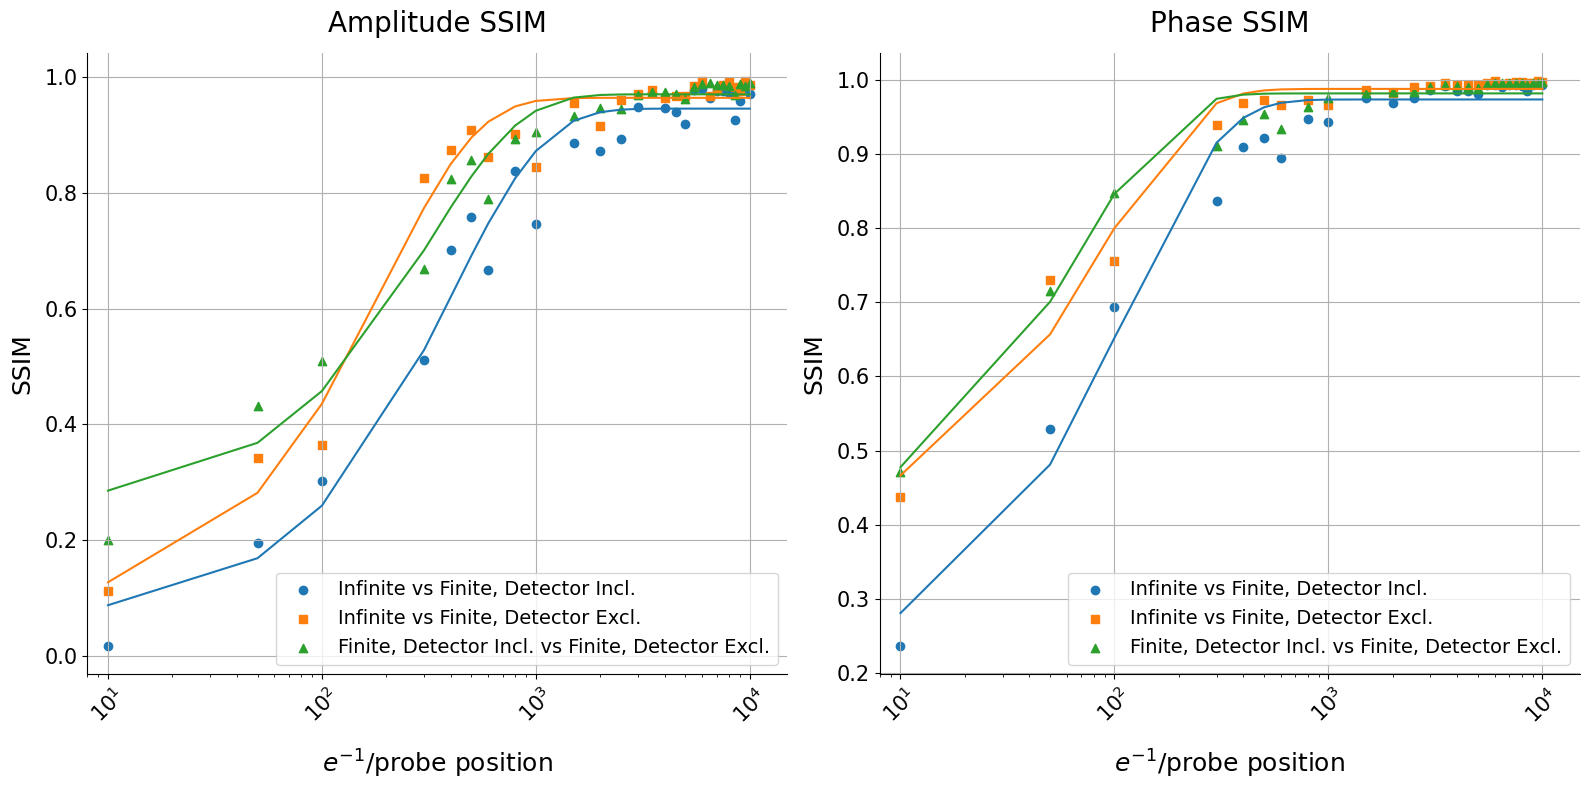

In [34]:
# Function to fit to the SSIM data
from scipy.optimize import curve_fit
def quadratic_plateau(x, m, a, b):
    return m*(b - np.exp(-a*x))


# Extract dose values from the dose_folders array using regular expression
dose_values = [int(re.search(r'\d+', folder).group()) for folder in dose_folders]


# Set the x-axis limits and ticks
x_ticks = [100, 500, 1000, 5000, 10000]  # Customize the ticks as needed
x_label_positions = dose_values + [5000, 10000]




# Fit the amplitude data to the quadratic plateau function
popt_amplitude_infinite_vs_influence, _ = curve_fit(quadratic_plateau, dose_values, 
                                              amplitude_ssim_infinite_influence_list)

popt_amplitude_infinite_vs_b4influence, _ = curve_fit(quadratic_plateau, dose_values, 
                                              amplitude_ssim_infinite_b4influence_list)

popt_amplitude_influence_vs_b4influence, _ = curve_fit(quadratic_plateau, dose_values, 
                                              amplitude_ssim_influence_b4influence_list)

# Fit the phase data to the quadratic plateau function
popt_phase_infinite_vs_influence, _ = curve_fit(quadratic_plateau, dose_values, 
                                              phase_ssim_infinite_influence_list)

popt_phase_infinite_vs_b4influence, _ = curve_fit(quadratic_plateau, dose_values, 
                                              phase_ssim_infinite_b4influence_list)

popt_phase_influence_vs_b4influence, _ = curve_fit(quadratic_plateau, dose_values, 
                                              phase_ssim_influence_b4influence_list)
# Plot the fitted curves amplitude
fit_values_amplitude_infinite_vs_influence = quadratic_plateau(np.array(dose_values), *popt_amplitude_infinite_vs_influence)

fit_values_amplitude_infinite_vs_b4influence = quadratic_plateau(np.array(dose_values), *popt_amplitude_infinite_vs_b4influence)

fit_values_amplitude_influence_vs_b4influence = quadratic_plateau(np.array(dose_values), *popt_amplitude_influence_vs_b4influence)


# Plot the fitted curves phase
fit_values_phase_infinite_vs_influence = quadratic_plateau(np.array(dose_values), *popt_phase_infinite_vs_influence)

fit_values_phase_infinite_vs_b4influence = quadratic_plateau(np.array(dose_values), *popt_phase_infinite_vs_b4influence)

fit_values_phase_influence_vs_b4influence = quadratic_plateau(np.array(dose_values), *popt_phase_influence_vs_b4influence)




# Plot the SSIM trends for amplitude images

axis_fontsize=18
title_fontsize=20
tick_fontsize=15
legend_fontsize=14
pad= 15
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(dose_values, amplitude_ssim_infinite_influence_list, label='Infinite vs Finite, Detector Incl.', marker='o')
plt.plot(dose_values, fit_values_amplitude_infinite_vs_influence)

plt.scatter(dose_values, amplitude_ssim_infinite_b4influence_list, label='Infinite vs Finite, Detector Excl.', marker='s')
plt.plot(dose_values, fit_values_amplitude_infinite_vs_b4influence)


plt.scatter(dose_values, amplitude_ssim_influence_b4influence_list, label='Finite, Detector Incl. vs Finite, Detector Excl.', marker='^')
plt.plot(dose_values, fit_values_amplitude_influence_vs_b4influence)


plt.xlabel(r'$e^{-1}$/probe position', fontsize=axis_fontsize, labelpad=pad)
plt.ylabel('SSIM', fontsize=axis_fontsize, labelpad=pad/2)


plt.title('Amplitude SSIM', fontsize=title_fontsize, pad=pad)
plt.legend(fontsize=legend_fontsize)
plt.xticks(x_label_positions, rotation=45, fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)  # Set y-axis tick font size
plt.xscale('log')
plt.xlim(8, 15000)  # Adjust the limits as needed
plt.grid(True)  # Add grid lines
plt.gca().spines['top'].set_visible(False)  # Remove top frame
plt.gca().spines['right'].set_visible(False)  # Remove right frame


# Plot the SSIM trends for phase images
plt.subplot(1, 2, 2)
plt.scatter(dose_values, phase_ssim_infinite_influence_list, label='Infinite vs Finite, Detector Incl.', marker='o')
plt.plot(dose_values, fit_values_phase_infinite_vs_influence)

plt.scatter(dose_values, phase_ssim_infinite_b4influence_list, label='Infinite vs Finite, Detector Excl.', marker='s')
plt.plot(dose_values, fit_values_phase_infinite_vs_b4influence)

plt.scatter(dose_values, phase_ssim_influence_b4influence_list, label='Finite, Detector Incl. vs Finite, Detector Excl.', marker='^')
plt.plot(dose_values, fit_values_phase_influence_vs_b4influence)


plt.xlabel(r'$e^{-1}$/probe position', fontsize=axis_fontsize, labelpad=pad)
plt.ylabel('SSIM', fontsize=axis_fontsize, labelpad=pad/2)
plt.title('Phase SSIM', fontsize=title_fontsize, pad=pad)
plt.legend(fontsize=legend_fontsize)
plt.xticks(x_label_positions, rotation=45, fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)  # Set y-axis tick font size
plt.xscale('log')
plt.xlim(8, 15000)  # Adjust the limits as needed
plt.grid(True)  # Add grid lines
plt.gca().spines['top'].set_visible(False)  # Remove top frame
plt.gca().spines['right'].set_visible(False)  # Remove right frame
plt.tight_layout()

# Save the plots as PNG, TIFF, and SVG files in the "SSIM_plots" subdirectory
output_subdirectory = os.path.join(parent_folder, "SSIM_plots")
os.makedirs(output_subdirectory, exist_ok=True)

plt.savefig(os.path.join(output_subdirectory, 'ssim_plot.png'), dpi=300)
plt.savefig(os.path.join(output_subdirectory, 'ssim_plot.tiff'), dpi=300, format='tiff')
plt.savefig(os.path.join(output_subdirectory, 'ssim_plot.svg'), format='svg')

plt.show()